In [1]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
from fabrictestbed.slice_manager import SliceManager, Status, SliceState
fablib = fablib_manager()

In [2]:
slice_name = "kalhan-cse-534-nat-2-servers"

In [7]:

#slice = fablib.new_slice(name=slice_name)

In [3]:
# # retrieve an existing slice
slice = fablib.get_slice(name=slice_name)

In [4]:
slice.get_state()

'StableOK'

In [ ]:
# from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
# fablib = fablib_manager()
# slice = fablib.get_slice(name=slice_name)
# slice.delete()

In [ ]:
fablib.list_sites(latlon=False)

In [8]:
site1='MICH'
site2='UTAH'
site3='NCSA'
site4 = 'STAR' # todo change topology and deploy switch at star. , USE STAR TOPOLOGY FOR DEPLOYONG THE SWITCH

print (f'The selected sites are {site1}, {site2}, {site3} {site4}') 

The selected sites are MICH, UTAH, NCSA STAR


In [9]:
client = slice.add_node(name="client", 
                      site=site1, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')

server1 = slice.add_node(name="server1", 
                      site=site2, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')
server2 = slice.add_node(name="server2", 
                      site=site3, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')


In [10]:
client_iface = client.add_component(model='NIC_Basic').get_interfaces()[0]
server1_iface = server1.add_component(model='NIC_Basic').get_interfaces()[0]
server2_iface = server2.add_component(model='NIC_Basic').get_interfaces()[0]

In [11]:
# Add a node for P4 switch
switch = slice.add_node(name="switch", 
                      site=site4, 
                      cores=32, 
                      ram=16, 
                      disk=40, 
                      image='default_ubuntu_20')

In [12]:
switch_client_iface = switch.add_component(model='NIC_Basic', name='client_nic').get_interfaces()[0]
switch_server1_iface = switch.add_component(model='NIC_Basic', name='server1_nic').get_interfaces()[0]
switch_server2_iface = switch.add_component(model='NIC_Basic', name='server2_nic').get_interfaces()[0]


In [13]:
switch_client_net = slice.add_l2network(name='switch_client_net', interfaces=[client_iface, switch_client_iface])
switch_server1_net = slice.add_l2network(name='switch_server1_net', interfaces=[switch_server1_iface, server1_iface])
switch_server2_net = slice.add_l2network(name='switch_server2_net', interfaces=[switch_server2_iface, server2_iface])

In [14]:
slice.submit()


Retry: 10, Time: 370 sec


ID,6a2c0f33-d690-42d7-824a-4d1ffcc6de68
Name,kalhan-cse-534-nat-2-servers
Lease Expiration (UTC),2024-04-14 15:07:32 +0000
Lease Start (UTC),2024-04-13 15:07:33 +0000
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
00465811-bad8-4fbd-9fe9-c896e8e137e3,client,4,8,100,default_ubuntu_20,qcow2,mich-w2.fabric-testbed.net,MICH,ubuntu,2607:f018:110:11:f816:3eff:fe02:10e1,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2607:f018:110:11:f816:3eff:fe02:10e1""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
99dec167-d7b4-42ec-be8b-244c7ab760ed,server1,4,8,100,default_ubuntu_20,qcow2,utah-w3.fabric-testbed.net,UTAH,ubuntu,2001:1948:417:7:f816:3eff:fe5d:8871,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:1948:417:7:f816:3eff:fe5d:8871""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
e379d909-b1e1-4f57-92f5-a9e00fe688b3,server2,4,8,100,default_ubuntu_20,qcow2,ncsa-w2.fabric-testbed.net,NCSA,ubuntu,2620:0:c80:1001:f816:3eff:fe03:8113,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2620:0:c80:1001:f816:3eff:fe03:8113""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
1c0295fa-0985-401d-ae82-845630783c48,switch,32,16,100,default_ubuntu_20,qcow2,star-w5.fabric-testbed.net,STAR,ubuntu,2001:400:a100:3030:f816:3eff:fec8:f02d,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3030:f816:3eff:fec8:f02d""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
37191a04-4429-4d01-9d74-6158e257bf50,switch_client_net,L2,L2STS,None,None,None,Active,
680e3333-5dd6-4427-a3c9-f43fbd974278,switch_server1_net,L2,L2STS,None,None,None,Active,
05e57c67-0d33-4707-887c-9478a6ff1c1a,switch_server2_net,L2,L2STS,None,None,None,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node
client-None-p1,p1,client,switch_client_net,100,config,,02:62:A2:9C:10:93,enp7s0,enp7s0,None,4
server1-None-p1,p1,server1,switch_server1_net,100,config,,0A:14:F1:7B:CA:59,enp7s0,enp7s0,None,4
server2-None-p1,p1,server2,switch_server2_net,100,config,,02:C6:60:49:95:60,enp7s0,enp7s0,None,4
switch-server1_nic-p1,p1,switch,switch_server1_net,100,config,,0A:B3:8E:41:D5:F6,enp8s0,enp8s0,None,4
switch-server2_nic-p1,p1,switch,switch_server2_net,100,config,,0E:2F:4D:8A:91:53,enp9s0,enp9s0,None,4
switch-client_nic-p1,p1,switch,switch_client_net,100,config,,0A:2B:94:0B:E8:1A,enp7s0,enp7s0,None,4



Time to print interfaces 379 seconds


'6a2c0f33-d690-42d7-824a-4d1ffcc6de68'

In [ ]:
for iface in slice.get_interfaces():
    print(iface)

#  NETWORK services


In [ ]:
for nw_service in slice.get_network_services():
    print(nw_service)

## NODE INFORMATION

In [ ]:
for node in slice.get_nodes():
    print(node)

In [16]:
from datetime import datetime
from datetime import timezone
from datetime import timedelta

#Set end host to now plus 1 day
end_date = (datetime.now(timezone.utc) + timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S %z")

try:
    slice = fablib.get_slice(name=slice_name)

    slice.renew(end_date)
except Exception as e:
    print(f"Exception: {e}")

In [17]:
### installing the switch 



switch = slice.get_node(name="switch")     
switch.upload_file('install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = switch.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

In [18]:
#The net-tools package will be installed on the switch, server1 and server2 nodes. This package will allow us to use the ifconfig and the arp commands

client = slice.get_node(name="client")
server1 = slice.get_node(name="server1")
server2 = slice.get_node(name="server2")
switch = slice.get_node(name="switch")


stdout, stderr = client.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = server1.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = server2.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = switch.execute(f'sudo apt-get install -y net-tools', quiet=True)

## EXECUTE BELOW FOR QUILY ACCESSING NODES

In [5]:
client = slice.get_node(name="client")
server1 = slice.get_node(name="server1")
switch = slice.get_node(name="switch")
server2 = slice.get_node(name="server2")

In [9]:
client_iface = client.get_interface(network_name='switch_client_net') 
client_iface_name = client_iface.get_device_name()
print(f'client_iface_name: {client_iface_name}')

switch_client_iface = switch.get_interface(network_name='switch_client_net') 
switch_client_iface_name = switch_client_iface.get_device_name()
print(f'switch_client_iface_name: {switch_client_iface_name}')

switch_s1_iface = switch.get_interface(network_name='switch_server1_net') 
switch_s1_iface_name = switch_s1_iface.get_device_name()
print(f'switch_s1_iface_name: {switch_s1_iface_name}')

switch_s2_iface = switch.get_interface(network_name='switch_server2_net') 
switch_s2_iface_name = switch_s2_iface.get_device_name()
print(f'switch_s2_iface_name: {switch_s2_iface_name}')

server1_iface = server1.get_interface(network_name='switch_server1_net') 
server1_iface_name = server1_iface.get_device_name()
print(f'server1_iface_name: {server1_iface_name}')

server2_iface = server2.get_interface(network_name='switch_server2_net') 
server2_iface_name = server2_iface.get_device_name()
print(f'server2_iface_name: {server2_iface_name}')

client_iface_name: enp7s0
switch_client_iface_name: enp7s0
switch_s1_iface_name: enp8s0
switch_s2_iface_name: enp9s0
server1_iface_name: enp7s0
server2_iface_name: enp7s0


In [21]:
### turning all the ifaces up

stdout, stderr = client.execute(f'sudo ip link set dev {client_iface_name} up', quiet=True)
stdout, stderr = switch.execute(f'sudo ip link set dev {switch_client_iface_name} up', quiet=True)
stdout, stderr = switch.execute(f'sudo ip link set dev {switch_s1_iface_name} up', quiet=True)
stdout, stderr = switch.execute(f'sudo ip link set dev {switch_s2_iface_name} up', quiet=True)
stdout, stderr = server1.execute(f'sudo ip link set dev {server1_iface_name} up', quiet=True)
stdout, stderr = server2.execute(f'sudo ip link set dev {server2_iface_name} up', quiet=True)

In [22]:
client_iface_MAC = '00:00:00:00:00:01'
switch_client_iface_MAC = '00:00:00:00:00:02'
switch_s1_iface_MAC = '00:00:00:00:00:03'
server1_iface_MAC = '00:00:00:00:00:04'
switch_s2_iface_MAC = '00:00:00:00:00:05'
server2_iface_MAC = '00:00:00:00:00:06'

In [23]:

## configuring ip and mac b/w client_iface and switch_iface1

client_switch_subnet = "192.168.1.0/24"
client_iface_ip = '192.168.1.10/24'
switch_client_iface_ip = '192.168.1.1/24'

stdout, stderr = client.execute(f'sudo ifconfig {client_iface_name} {client_iface_ip}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_client_iface_name} {switch_client_iface_ip}')

stdout, stderr = client.execute(f'sudo ifconfig {client_iface_name} hw ether {client_iface_MAC}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_client_iface_name} hw ether {switch_client_iface_MAC}')

In [24]:

## configuring ip and mac b/w server1_iface and switch_iface2

server1_switch_subnet = "192.168.2.0/24"
server1_iface_ip = '192.168.2.10/24'
switch_s1_iface_ip = '192.168.2.1/24'

stdout, stderr = server1.execute(f'sudo ifconfig {server1_iface_name} {server1_iface_ip}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_s1_iface_name} {switch_s1_iface_ip}')

stdout, stderr = server1.execute(f'sudo ifconfig {server1_iface_name} hw ether {server1_iface_MAC}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_s1_iface_name} hw ether {switch_s1_iface_MAC}')

In [25]:

## configuring ip and mac b/w server1_iface and switch_iface2

server2_switch_subnet = "192.168.3.0/24"
server2_iface_ip = '192.168.3.10/24'
switch_s2_iface_ip = '192.168.3.1/24'

stdout, stderr = server2.execute(f'sudo ifconfig {server2_iface_name} {server2_iface_ip}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_s2_iface_name} {switch_s2_iface_ip}')

stdout, stderr = server2.execute(f'sudo ifconfig {server2_iface_name} hw ether {server2_iface_MAC}')
stdout, stderr = switch.execute(f'sudo ifconfig {switch_s2_iface_name} hw ether {switch_s2_iface_MAC}')

In [26]:

## enable ip forwarding on switch
command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = switch.execute(command, quiet=True)

In [27]:
## In this step, we are deleting the routes on the switch's routing table in Linux. By deleting the routes, the packets will go through the BMv2 switch instead of being forwarded by the kernel

stdout, stderr = switch.execute(f'sudo ip route del {client_switch_subnet}', quiet=True)
stdout, stderr = switch.execute(f'sudo ip route del {server1_switch_subnet}', quiet=True)
stdout, stderr = switch.execute(f'sudo ip route del {server2_switch_subnet}', quiet=True)

In [28]:
### configure static routing


switch_client_gw = switch_client_iface_ip.split('/')[0]
switch_s1_gw = switch_s1_iface_ip.split('/')[0]
switch_s2_gw = switch_s2_iface_ip.split('/')[0]

print(switch_client_gw)
print(switch_s1_gw)
print(switch_s2_gw)




192.168.1.1
192.168.2.1
192.168.3.1


#### NOT SETTING UP ANY ROUTES FOR NAT

In [29]:
stdout, stderr = client.execute(f'sudo ip route add {server2_switch_subnet} via {switch_client_gw}')
stdout, stderr = client.execute(f'sudo ip route add {server1_switch_subnet} via {switch_client_gw}')

stdout, stderr = server1.execute(f'sudo ip route add {client_switch_subnet} via {switch_s1_gw}')
stdout, stderr = server2.execute(f'sudo ip route add {client_switch_subnet} via {switch_s2_gw}')

In [30]:
### hardcoding arp so that these packets are not sent from the nodes to the bmv switch
stdout, stderr = client.execute(f'sudo arp -s {switch_client_gw} {switch_client_iface_MAC}')
stdout, stderr = server1.execute(f'sudo arp -s {switch_s1_gw} {switch_s1_iface_MAC}')
stdout, stderr = server2.execute(f'sudo arp -s {switch_s2_gw} {switch_s2_iface_MAC}')

In [31]:
stdout, stderr = switch.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

In [8]:
stdout, stderr = client.execute(f'sudo apt-get update && sudo apt-get install -y python3-scapy', quiet=True)

In [51]:
switch.upload_file('tcp-checksum-port-mapping.p4', 'main.p4')
# stdout, stderr = switch.execute(f'p4c main.p4')
# stdout, stderr = switch.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{switch_client_iface_name} -i 1@{switch_s1_iface_name} -i 2@{switch_s2_iface_name} main.json --log-console')

sudo simple_switch -i 0@enp7s0 -i 1@enp8s0 -i 2@enp9s0 main.json --log-console


In [16]:
#upload match action rules directly from the rules file
switch.upload_file('tcp-checksum-latest-rules.sh', 'tcp-checksum-latest-rules.sh')
stdout, stderr = switch.execute('chmod +x tcp-checksum-latest-rules.sh && ./tcp-checksum-latest-rules.sh')


Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to exact match table MyIngress.forward_nat
match key:           EXACT-00	EXACT-00:00:00:00	EXACT-00:00
action:              MyIngress.send_to_server
runtime data:        00:00:00:00:00:03	00:00:00:00:00:04	c0:a8:02:0a	00:01	00:50
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to exact match table MyIngress.forward_nat
match key:           EXACT-01	EXACT-00:00:00:00	EXACT-00:00
action:              MyIngress.send_to_server
runtime data:        00:00:00:00:00:03	00:00:00:00:00:04	c0:a8:02:0a	00:01	00:50
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to exact match table MyIngress.forward_nat
match key:           EXACT-01	EXACT-00:00:00:01	EXACT-00:00
action:    

### change register state to 0


In [68]:

switch.upload_file('register-modify-state0.sh', 'register-modify-state0.sh')
stdout, stderr = switch.execute('chmod +x register-modify-state0.sh && ./register-modify-state0.sh')


Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: 


### change register state to 1

In [75]:

switch.upload_file('register-modify-state1.sh', 'register-modify-state1.sh')
stdout, stderr = switch.execute('chmod +x register-modify-state1.sh && ./register-modify-state1.sh')


Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: 


In [58]:
server1.upload_file('api_code.py', 'api_code.py')
server2.upload_file('api_code.py', 'api_code.py')

<SFTPAttributes: [ size=484 uid=1000 gid=1000 mode=0o100664 atime=1713031183 mtime=1713031330 ]>

### high perfm switching and disable tcp offloading

In [ ]:
### high performance switching
switch.upload_file('scripts/simple_switch_hp.gz', '/home/ubuntu/simple_switch_hp.gz')
switch.execute('gzip -d simple_switch_hp.gz')
switch.execute('chmod +x /home/ubuntu/simple_switch_hp')
stdout, stderr = switch.execute(f'sudo pkill switch')

switch.upload_file('scripts/disable_offload.sh', 'disable_offload.sh')
stdout, stderr = switch.execute(f'sudo chmod +x ./disable_offload.sh && sudo ./disable_offload.sh {switch_client_iface_name}', quiet=True)
stdout, stderr = switch.execute(f'sudo chmod +x ./disable_offload.sh && sudo ./disable_offload.sh {switch_s1_iface_name}', quiet=True)
stdout, stderr = switch.execute(f'sudo chmod +x ./disable_offload.sh && sudo ./disable_offload.sh {switch_s2_iface_name}', quiet=True)

In [73]:
### run the hp switch
print(f'sudo /home/ubuntu/simple_switch_hp -i 0@{switch_client_iface_name} -i 1@{switch_s1_iface_name} -i 2@{switch_s2_iface_name} main.json &')

sudo /home/ubuntu/simple_switch_hp -i 0@enp7s0 -i 1@enp8s0 -i 2@enp9s0 main.json &


In [45]:
server1.upload_file("jupyter-examples-rel1.6.1/fabric_examples/complex_recipes/p4_labs_bmv2/labs_files/cse534/recv.py","recv.py") 

<SFTPAttributes: [ size=1707 uid=1000 gid=1000 mode=0o100664 atime=1712216143 mtime=1712217276 ]>

In [25]:
switch.upload_file("jupyter-examples-rel1.6.1/fabric_examples/complex_recipes/p4_labs_bmv2/labs_files/cse534/recv.py","recv.py") 

<SFTPAttributes: [ size=1707 uid=1000 gid=1000 mode=0o100664 atime=1712262556 mtime=1712262556 ]>

In [26]:
client.upload_file("jupyter-examples-rel1.6.1/fabric_examples/complex_recipes/p4_labs_bmv2/labs_files/cse534/recv.py","recv.py") 

<SFTPAttributes: [ size=1707 uid=1000 gid=1000 mode=0o100664 atime=1712263004 mtime=1712263004 ]>

### we now start setting up of the mflib on the nodes


In [76]:
import mflib 
print(f"MFLib version  {mflib.__version__} " )

from mflib.mflib import MFLib

MFLib version  1.0.4 


In [79]:
client_nw_pr_name='client_nw_pr'
s1_nw_pr_name='s1_nw_pr'
s2_nw_pr_name='s2_nw_pr'

client_nic_name = 'client_nic_pr'
s1_nic_name = 's1_nic_pr'
s2_nic_name = 's2_nic_pr'

In [83]:
client.get_component(name=client_nic_name).get_interfaces()[0]

In [87]:
try:
    
    # client
    client_iface_pr = client.add_component(model='NIC_Basic', name=client_nic_name).get_interfaces()[0]
    
    # server1
    s1_iface_pr = server1.add_component(model='NIC_Basic', name=s1_nic_name).get_interfaces()[0]
    
    # server2
    s2_iface_pr = server2.add_component(model='NIC_Basic', name=s2_nic_name).get_interfaces()[0]

    # NetworkS
    
    client_iface_pr = client.get_component(name=client_nic_name).get_interfaces()[0]
    s1_iface_pr = server1.get_component(name=s1_nic_name).get_interfaces()[0]
    s2_iface_pr = server2.get_component(name=s2_nic_name).get_interfaces()[0]
    
    client_nw_pr = slice.add_l3network(name=client_nw_pr_name, interfaces=[client_iface_pr], type='IPv4')
    s1_nw_pr = slice.add_l3network(name=s1_nw_pr_name, interfaces=[s1_iface_pr], type='IPv4')
    s2_nw_pr = slice.add_l3network(name=s2_nw_pr_name, interfaces=[s2_iface_pr], type='IPv4')
except Exception as e:
    print(f"Exception: {e}")

In [88]:
### add the measurement node

MFLib.addMeasNode(slice, disk=100)
print("Done")

Done


In [89]:
### submit the slice again because we addded a meas node

slice.submit()


Retry: 7, Time: 508 sec


ID,6a2c0f33-d690-42d7-824a-4d1ffcc6de68
Name,kalhan-cse-534-nat-2-servers
Lease Expiration (UTC),2024-04-20 15:14:24 +0000
Lease Start (UTC),2024-04-13 15:07:33 +0000
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
00465811-bad8-4fbd-9fe9-c896e8e137e3,client,4,8,100,default_ubuntu_20,qcow2,mich-w2.fabric-testbed.net,MICH,ubuntu,2607:f018:110:11:f816:3eff:fe02:10e1,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2607:f018:110:11:f816:3eff:fe02:10e1""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
7023a296-d177-442a-b883-e621c42dc866,meas-node,4,16,100,default_ubuntu_20,qcow2,edc-w1.fabric-testbed.net,EDC,ubuntu,2620:0:c80:1003:f816:3eff:fe3b:a2f6,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2620:0:c80:1003:f816:3eff:fe3b:a2f6""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
99dec167-d7b4-42ec-be8b-244c7ab760ed,server1,4,8,100,default_ubuntu_20,qcow2,utah-w3.fabric-testbed.net,UTAH,ubuntu,2001:1948:417:7:f816:3eff:fe5d:8871,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:1948:417:7:f816:3eff:fe5d:8871""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
e379d909-b1e1-4f57-92f5-a9e00fe688b3,server2,4,8,100,default_ubuntu_20,qcow2,ncsa-w2.fabric-testbed.net,NCSA,ubuntu,2620:0:c80:1001:f816:3eff:fe03:8113,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2620:0:c80:1001:f816:3eff:fe03:8113""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
1c0295fa-0985-401d-ae82-845630783c48,switch,32,16,100,default_ubuntu_20,qcow2,star-w5.fabric-testbed.net,STAR,ubuntu,2001:400:a100:3030:f816:3eff:fec8:f02d,Active,,"ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3030:f816:3eff:fec8:f02d""s",/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
47b8dd77-a9d7-417e-a3dd-5b13a18251f3,client_nw_pr,L3,FABNetv4,MICH,10.131.2.0/24,10.131.2.1,Active,
150f0ec9-da0a-4c65-98a9-d64b3b7a4221,l3_meas_net_EDC,L3,FABNetv4,EDC,10.132.148.0/24,10.132.148.1,Active,
405fd18a-a01c-423a-a50c-3dd846aa10f9,l3_meas_net_MICH,L3,FABNetv4,MICH,10.131.13.0/24,10.131.13.1,Active,
ce2e8eb8-d49c-42e8-9012-8c1c87975730,l3_meas_net_NCSA,L3,FABNetv4,NCSA,10.132.146.0/24,10.132.146.1,Active,
82d0c36e-b6ac-4592-a6d2-c212d90bbc1b,l3_meas_net_STAR,L3,FABNetv4,STAR,10.129.156.0/24,10.129.156.1,Active,
a40ce3ad-8e01-4c27-966a-380610a149ce,l3_meas_net_UTAH,L3,FABNetv4,UTAH,10.132.17.0/24,10.132.17.1,Active,
c67c3ebc-2b40-49d5-8fe4-fbcace910d2c,s1_nw_pr,L3,FABNetv4,UTAH,10.132.18.0/24,10.132.18.1,Active,
6669ad02-b0e1-41c2-9376-c8eb1f9ed9fb,s2_nw_pr,L3,FABNetv4,NCSA,10.132.147.0/24,10.132.147.1,Active,
37191a04-4429-4d01-9d74-6158e257bf50,switch_client_net,L2,L2STS,None,None,None,Active,
680e3333-5dd6-4427-a3c9-f43fbd974278,switch_server1_net,L2,L2STS,None,None,None,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node
switch-server2_nic-p1,p1,switch,switch_server2_net,100,config,,0E:2F:4D:8A:91:53,None,None,"[{'ifindex': 1, 'ifname': 'lo', 'flags': ['LOOPBACK', 'UP', 'LOWER_UP'], 'mtu': 65536, 'qdisc': 'noqueue', 'operstate': 'UNKNOWN', 'group': 'default', 'txqlen': 1000, 'link_type': 'loopback', 'address': '00:00:00:00:00:00', 'broadcast': '00:00:00:00:00:00', 'addr_info': [{'family': 'inet', 'local': '127.0.0.1', 'prefixlen': 8, 'scope': 'host', 'label': 'lo', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}, {'family': 'inet6', 'local': '::1', 'prefixlen': 128, 'scope': 'host', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}]}, {'ifindex': 2, 'ifname': 'enp3s0', 'flags': ['BROADCAST', 'MULTICAST', 'UP', 'LOWER_UP'], 'mtu': 9000, 'qdisc': 'fq_codel', 'operstate': 'UP', 'group': 'default', 'txqlen': 1000, 'link_type': 'ether', 'address': 'fa:16:3e:c8:f0:2d', 'broadcast': 'ff:ff:ff:ff:ff:ff', 'addr_info': [{'family': 'inet', 'local': '10.30.6.41', 'prefixlen': 23, 'broadcast': '10.30.7.255', 'scope': 'global', 'dynamic': True, 'label': 'enp3s0', 'valid_life_time': 53163, 'preferred_life_time': 53163}, {'family': 'inet6', 'local': '2001:400:a100:3030:f816:3eff:fec8:f02d', 'prefixlen': 64, 'scope': 'global', 'dynamic': True, 'mngtmpaddr': True, 'noprefixroute': True, 'valid_life_time': 86400, 'preferred_life_time': 14400}, {'family': 'inet6', 'local': 'fe80::f816:3eff:fec8:f02d', 'prefixlen': 64, 'scope': 'link', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}]}, {'ifindex': 3, 'ifname': 'enp7s0', 'flags': ['BROADCAST', 'MULTICAST', 'UP', 'LOWER_UP'], 'mtu': 1500, 'qdisc': 'mq', 'operstate': 'UP', 'group': 'default', 'txqlen': 1000, 'link_type': 'ether', 'address': '00:00:00:00:00:02', 'broadcast': 'ff:ff:ff:ff:ff:ff', 'addr_info': [{'family': 'inet', 'local': '192.168.1.1', 'prefixlen': 24, 'broadcast': '192.168.1.255', 'scope': 'global', 'label': 'enp7s0', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}, {'family': 'inet6', 'local': 'fe80::82b:94ff:fe0b:e81a', 'prefixlen': 64, 'scope': 'link', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}]}, {'ifindex': 4, 'ifname': 'enp8s0', 'flags': ['BROADCAST', 'MULTICAST', 'UP', 'LOWER_UP'], 'mtu': 1500, 'qdisc': 'mq', 'operstate': 'UP', 'group': 'default', 'txqlen': 1000, 'link_type': 'ether', 'address': '00:00:00:00:00:03', 'broadcast': 'ff:ff:ff:ff:ff:ff', 'addr_info': [{'family': 'inet', 'local': '192.168.2.1', 'prefixlen': 24, 'broadcast': '192.168.2.255', 'scope': 'global', 'label': 'enp8s0', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}, {'family': 'inet6', 'local': 'fe80::8b3:8eff:fe41:d5f6', 'prefixlen': 64, 'scope': 'link', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}]}, {'ifindex': 5, 'ifname': 'enp9s0', 'flags': ['BROADCAST', 'MULTICAST', 'UP', 'LOWER_UP'], 'mtu': 1500, 'qdisc': 'mq', 'operstate': 'UP', 'group': 'default', 'txqlen': 1000, 'link_type': 'ether', 'address': '00:00:00:00:00:05', 'broadcast': 'ff:ff:ff:ff:ff:ff', 'addr_info': [{'family': 'inet', 'local': '192.168.3.1', 'prefixlen': 24, 'broadcast': '192.168.3.255', 'scope': 'global', 'label': 'enp9s0', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}, {'family': 'inet6', 'local': 'fe80::c2f:4dff:fe8a:9153', 'prefixlen': 64, 'scope': 'link', 'valid_life_time': 4294967295, 'preferred_life_time': 4294967295}]}, {'ifindex': 6, 'ifname': 'enp10s0', 'flags': ['BROADCAST', 'MULTICAST'], 'mtu': 1500, 'qdisc': 'noop', 'operstate': 'DOWN', 'group': 'default', 'txqlen': 1000, 'link_type': 'ether', 'address': '0e:3d:21:68:cf:8f', 'broadcast': 'ff:ff:ff:ff:ff:ff', 'addr_info': []}]",4
switch-client_nic-p1,p1,switch,switch_client_net,100,config,,0A:2B:94:0B:E8:1A,None,None,"[{'ifindex': 1, 'ifname': 'lo', 'flags': ['LOOPBACK', 'UP', 'LOWER_UP'], 'mtu': 65536, 'qdisc': 'noqueue', 'operstate': 'UNKNOWN'


Time to print interfaces 530 seconds


'6a2c0f33-d690-42d7-824a-4d1ffcc6de68'

In [7]:
# Check version
import mflib 
print(f"MFLib version  {mflib.__version__} " )

# Import MFLib Class
from mflib.mflib import MFLib

MFLib version  1.0.4 


In [8]:
%%time
mf = MFLib(slice_name)
instrumetize_results = mf.instrumentize( ["prometheus"] )

Inititializing slice "kalhan-cse-534-nat-2-servers" for MeasurementFramework.
Found meas node as meas-node at 2620:0:c80:1003:f816:3eff:fe3b:a2f6
Bootstrap status indicates Slice Measurement Framework is ready.
Instrumentizing slice "kalhan-cse-534-nat-2-servers"
   Setting up Prometheus...
   Setting up Prometheus done.
   Setting up grafana_manager & dashboards...
   Setting up grafana_manager & dashboards done.
Instrumentize Process Complete.
CPU times: user 3.23 s, sys: 81.1 ms, total: 3.31 s
Wall time: 1min 4s


In [9]:
# Grafana SSH Tunnel Command
# mf.grafana_tunnel_local_port = 10010 # optionally change the port
print(mf.grafana_tunnel)

print(f"Browse to https://localhost:{mf.grafana_tunnel_local_port}/grafana/dashboards?query=%2A")

ssh -L 10010:localhost:443 -F ssh_config -i slice_key ubuntu@2620:0:c80:1003:f816:3eff:fe3b:a2f6
Browse to https://localhost:10010/grafana/dashboards?query=%2A


In [14]:
import json
print("client")
for iface in client.get_interfaces():
    x = iface.toDict()
    if x['physical_dev']=='None':
        # print(x["ip_addr"])
        k = x["ip_addr"].replace("True","true")
        k = k.replace("'",'"')
        k = json.loads(k)
        for z in k:
            if z['operstate']=='UP':
                print(f" iface {z['ifname']} mac {z['address']} ip {z['addr_info'][0]['local']}")
 
print("///////////////")
print("server1")
for iface in server1.get_interfaces():
    x = iface.toDict()
    if x['physical_dev']=='None':
        # print(x["ip_addr"])
        k = x["ip_addr"].replace("True","true")
        k = k.replace("'",'"')
        k = json.loads(k)
        for z in k:
            if z['operstate']=='UP':
                print(f" iface {z['ifname']} mac {z['address']} ip {z['addr_info'][0]['local']}")
                
print("///////////////")               
print("server2")
for iface in server2.get_interfaces():
    x = iface.toDict()
    if x['physical_dev']=='None':
        # print(x["ip_addr"])
        k = x["ip_addr"].replace("True","true")
        k = k.replace("'",'"')
        k = json.loads(k)
        for z in k:
            if z['operstate']=='UP':
                print(f" iface {z['ifname']} mac {z['address']} ip {z['addr_info'][0]['local']}")

print("///////////")
print("switch")
for iface in switch.get_interfaces():
    x = iface.toDict()
    if x['physical_dev']=='None':
        # print(x["ip_addr"])
        k = x["ip_addr"].replace("True","true")
        k = k.replace("'",'"')
        k = json.loads(k)
        for z in k:
            if z['operstate']=='UP':
                print(f" iface {z['ifname']} mac {z['address']} ip {z['addr_info'][0]['local']}")
            

client
 iface enp3s0 mac fa:16:3e:02:10:e1 ip 10.30.6.18
 iface enp7s0 mac 00:00:00:00:00:01 ip 192.168.1.10
 iface enp8s0 mac 06:56:3e:60:6b:79 ip 10.131.13.2
///////////////
server1
 iface enp3s0 mac fa:16:3e:5d:88:71 ip 10.30.6.66
 iface enp7s0 mac 00:00:00:00:00:04 ip 192.168.2.10
 iface enp8s0 mac 0a:1c:97:87:03:3c ip 10.132.17.2
///////////////
server2
 iface enp3s0 mac fa:16:3e:03:81:13 ip 10.30.6.103
 iface enp7s0 mac 00:00:00:00:00:06 ip 192.168.3.10
 iface enp9s0 mac 16:e2:21:cf:c2:97 ip 10.132.146.2
///////////
switch


In [19]:
from mflib.data_transfer import PrometheusExporter
prom_tools = PrometheusExporter(slice_name = slice_name)
data={}
data["get"] = ["ht_user", "ht_password"]
prom_creds = prom_tools.info("prometheus",data)
print(prom_creds)

Inititializing slice "kalhan-cse-534-nat-2-servers" for MeasurementFramework.
Found meas node as meas-node at 2620:0:c80:1003:f816:3eff:fe3b:a2f6
Bootstrap status indicates Slice Measurement Framework is ready.
{'ht_user': 'egcefqfY', 'ht_password': 'cjpFSsTo'}


#### DOWNLOADING FILES FROM THE CLIENT SERVER AND SWITCH


In [32]:
# server1.os_reboot()

In [44]:
### Install scapy on client and server1
stdout, stderr = client.execute(f'sudo apt-get update && sudo apt-get install -y python3-scapy', quiet=True)
stdout, stderr = server1.execute(f'sudo apt-get update && sudo apt-get install -y python3-scapy', quiet=True)


In [26]:
server1.upload_file('jupyter-examples-rel1.6.1/fabric_examples/complex_recipes/p4_labs_bmv2/scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = server1.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

In [45]:
switch.upload_file('jupyter-examples-rel1.6.1/fabric_examples/complex_recipes/p4_labs_bmv2/labs_files/cse534/rules-with-nat-del.sh', 'rules-with-nat-del.sh')

<SFTPAttributes: [ size=185 uid=1000 gid=1000 mode=0o100664 atime=1711760367 mtime=1711760367 ]>

In [50]:
stdout, stderr = server2.execute(f'sudo python3 send.py enp7s0 192.168.3.10 192.168.3.1 hello')

sending on interface enp7s0 to 192.168.3.1
###[ Ethernet ]### 
  dst       = 00:00:00:00:00:04
  src       = 00:00:00:00:00:06
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 45
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0xf36e
     src       = 192.168.3.10
     dst       = 192.168.3.1
     \options   \
###[ TCP ]### 
        sport     = 52218
        dport     = 1234
        seq       = 0
        ack       = 0
        dataofs   = 5
        reserved  = 0
        flags     = S
        window    = 8192
        chksum    = 0xf3e2
        urgptr    = 0
        options   = []
###[ Raw ]### 
           load      = 'hello'



In [20]:


l2_nets = [(n.get_name(), {'color': 'lavender'}) for n in slice.get_l2networks() ]
l3_nets = [(n.get_name(), {'color': 'pink'}) for n in slice.get_l3networks() ]
hosts   =   [(n.get_name(), {'color': 'lightblue'}) for n in slice.get_nodes()]
nodes = l2_nets + l3_nets + hosts
ifaces = [iface.toDict() for iface in slice.get_interfaces()]
edges = [(iface['network'], iface['node'], 
          {'label': iface['physical_dev'] + '\n' + iface['ip_addr'] + '\n' + iface['mac']}) for iface in ifaces]
     
     

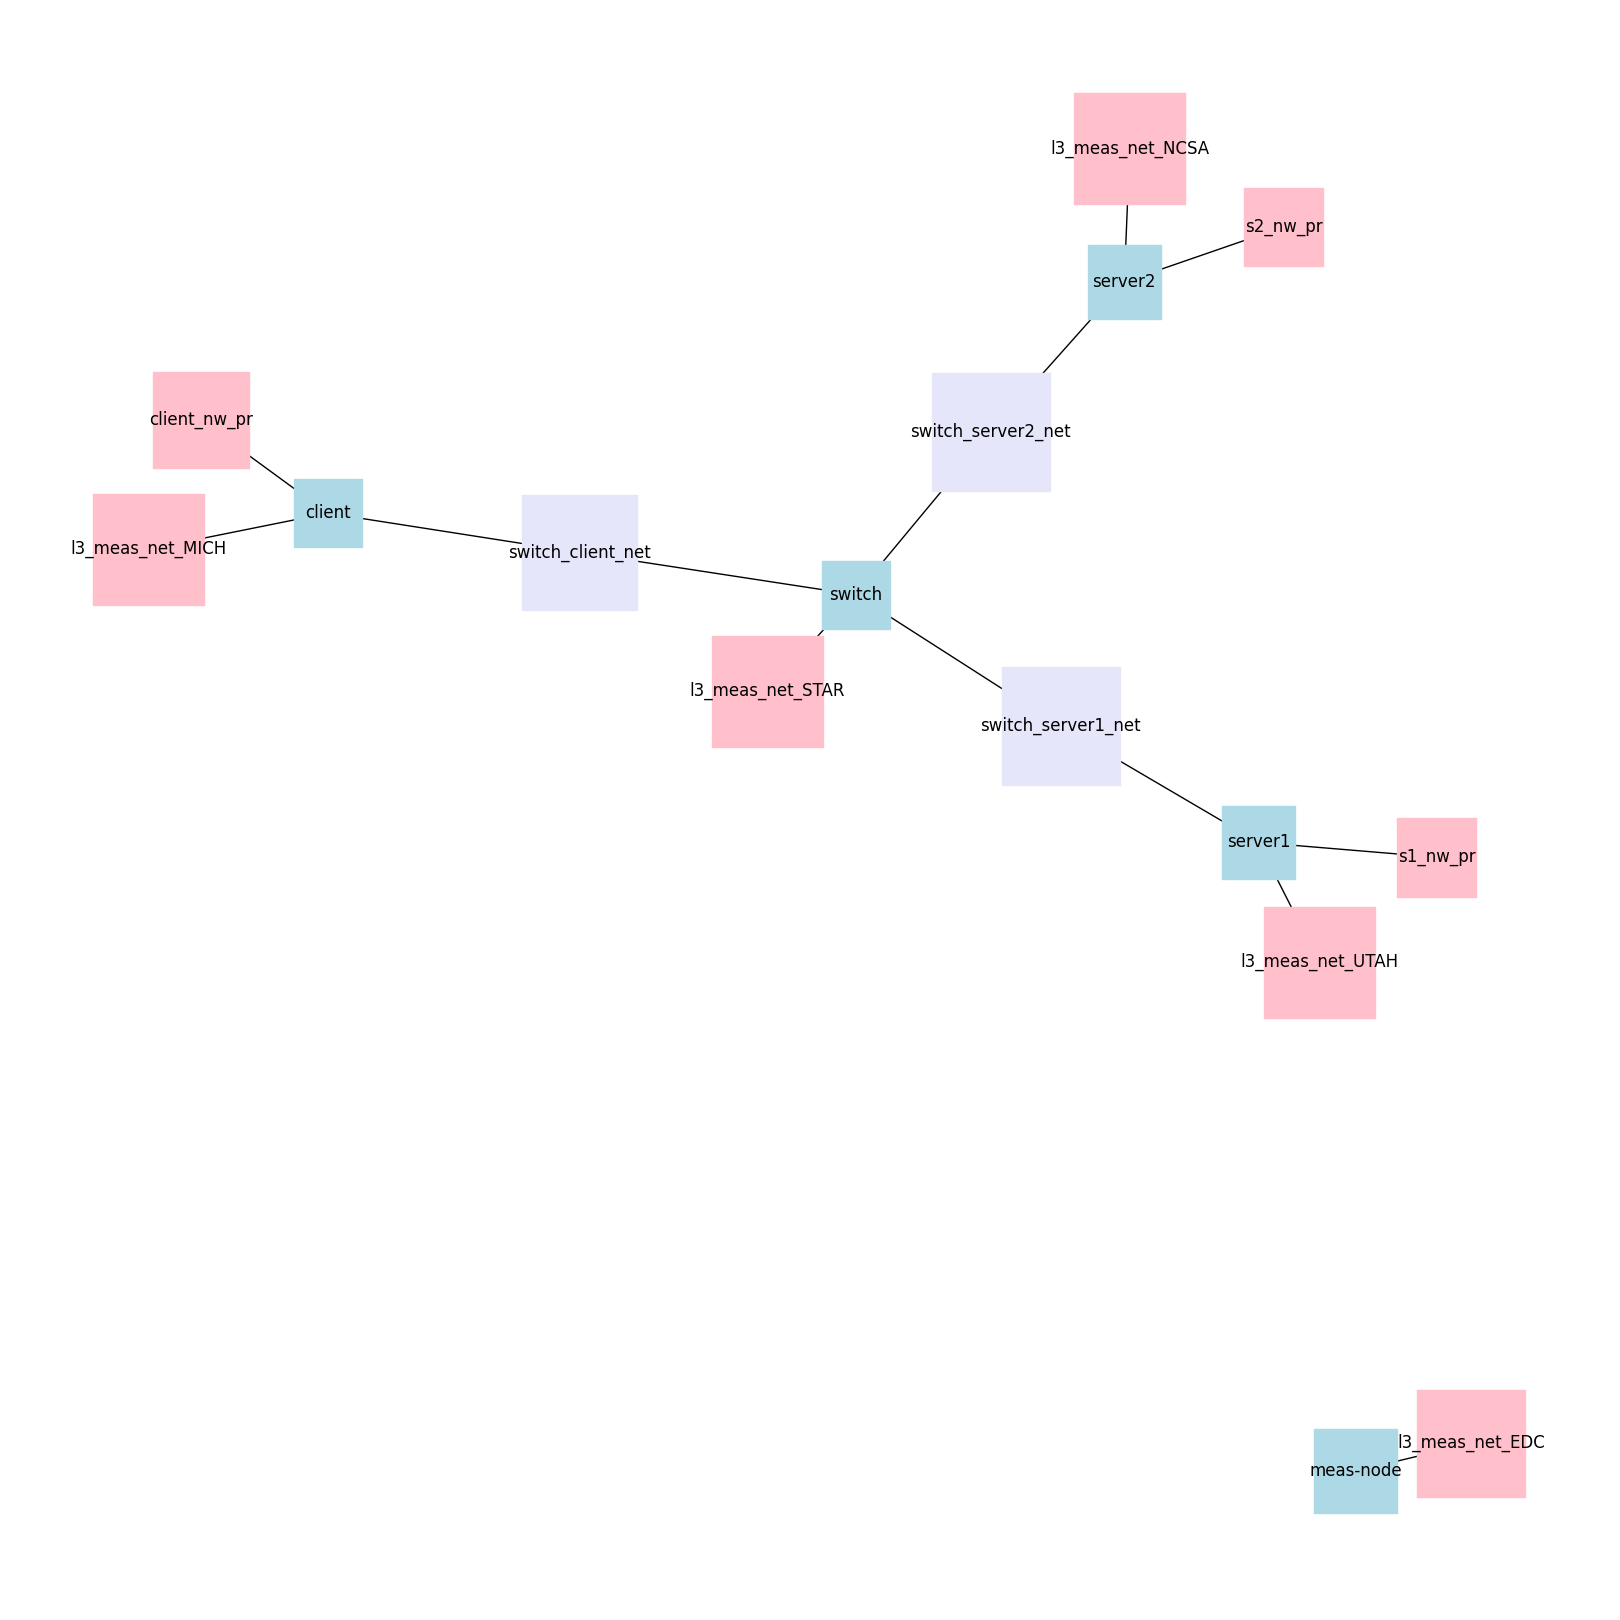

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(len(nodes),len(nodes)))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_shape='s',  
        node_color=[n[1]['color'] for n in nodes], 
        node_size=[len(n[0])*400 for n in nodes],  
        with_labels=True);
# nx.draw_networkx_edge_labels(G,pos,
#                              edge_labels=nx.get_edge_attributes(G,'label'),
#                              font_color='gray',  font_size=8, rotate=False);